In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

plt.rc('axes', titlesize=20)
plt.rc('figure', figsize=(16, 10))

In [2]:
df = pd.read_csv("stats.csv", index_col="date", parse_dates=['date'], infer_datetime_format=True)
cases_df = df.loc[:, ["cases", "deaths"]]
tests_df = df.loc[:, ["cases", "test_total"]]

evolution_df = df.diff()[["cases", "deaths", "test_total"]].iloc[1:]

In [3]:
smas = pd.DataFrame()
smas["cases_SMA_7"] = evolution_df["cases"].rolling(window=7).mean()
smas["cases_SMA_21"] = evolution_df["cases"].rolling(window=21).mean()

smas["deaths_SMA_7"] = evolution_df["deaths"].rolling(window=7).mean()
smas["deaths_SMA_21"] = evolution_df["deaths"].rolling(window=21).mean()

def to_pct_string(frame):
    new_frame = pd.DataFrame()
    for column in frame.columns:
        new_frame[column] = pd.Series(["{0:.2f}%".format(val * 100) for val in frame[column]], index = frame.index)
    return new_frame

# Evolution Charts

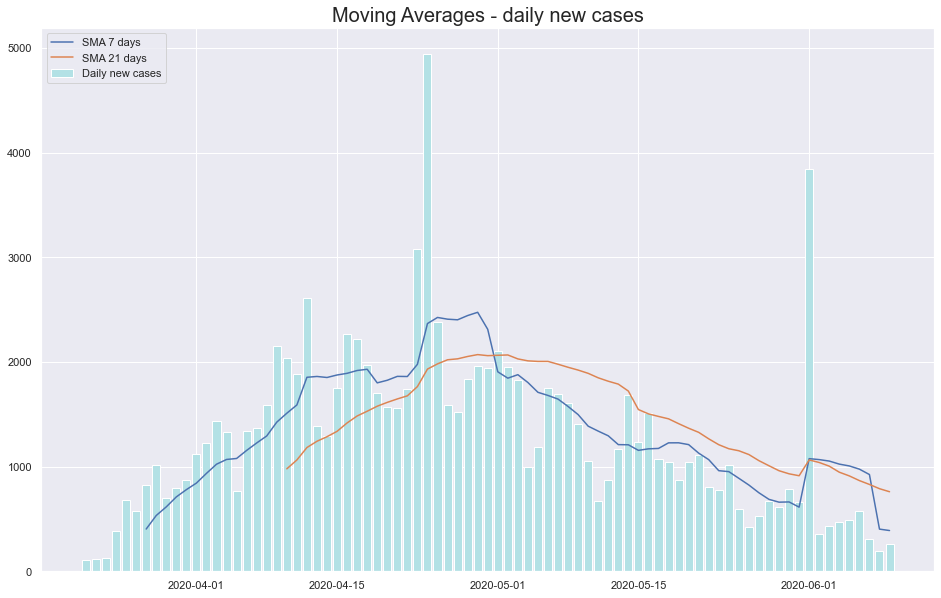

In [4]:
@interact
def show_change_chart(days=widgets.IntSlider(min=1, max=len(smas), value=len(smas)), 
                      show_cases=True, 
                      show_deaths=False,
                      show_totals=widgets.ToggleButtons(options=['All', 'None', 'Cases', 'Deaths'], value='Cases')):
    data = smas.iloc[-days:]
    evolution_local = evolution_df.iloc[-days:]
    if show_cases:
        plt.plot(data["cases_SMA_7"], label="SMA 7 days")
        plt.plot(data["cases_SMA_21"], label="SMA 21 days")
        
    if show_deaths:
        plt.plot(data["deaths_SMA_7"], label="SMA 7 days")
        plt.plot(data["deaths_SMA_21"], label="SMA 21 days")
        
    if show_totals in ['All', 'Cases']:
        plt.bar(evolution_local.index, evolution_local["cases"], label="Daily new cases", color="#b3e1e5")
        
    if show_totals in ['All', 'Deaths']:
        plt.bar(evolution_local.index, evolution_local["deaths"], label="Daily deaths", color="#facfee")
        
    plt.legend(loc=2)
    plt.title("Moving Averages - daily new cases")
    plt.show()

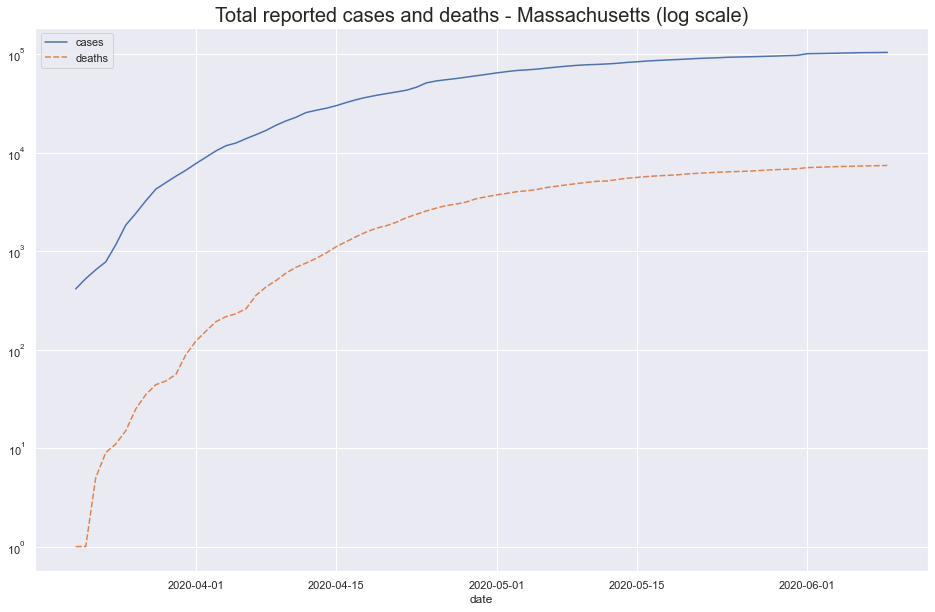

In [5]:
# plt.figure(figsize=(16, 10))

@interact
def show_cases(scale=['log', 'linear']):
    ax = sns.lineplot(data=cases_df)
    ax.set_yscale(scale)

    plt.title("Total reported cases and deaths - Massachusetts ({} scale)".format(scale))
    plt.show()

In [6]:
@interact
def show_pct_change(days=widgets.IntSlider(min=0, max=len(smas), step=1, value=7)):
    return to_pct_string(smas.pct_change().iloc[-days:])

,cases_SMA_7,cases_SMA_21,deaths_SMA_7,deaths_SMA_21
date,,,,
2020-06-03,-1.31%,-3.37%,-1.14%,-5.50%
2020-06-04,-2.77%,-5.75%,-7.27%,-6.42%
2020-06-05,-1.72%,-3.75%,-7.84%,-4.42%
2020-06-06,-3.04%,-4.90%,0.77%,-3.59%
2020-06-07,-5.27%,-4.25%,-9.79%,-4.10%
2020-06-08,-56.41%,-4.89%,-32.34%,-1.84%
2020-06-09,-3.37%,-3.68%,1.57%,-1.41%


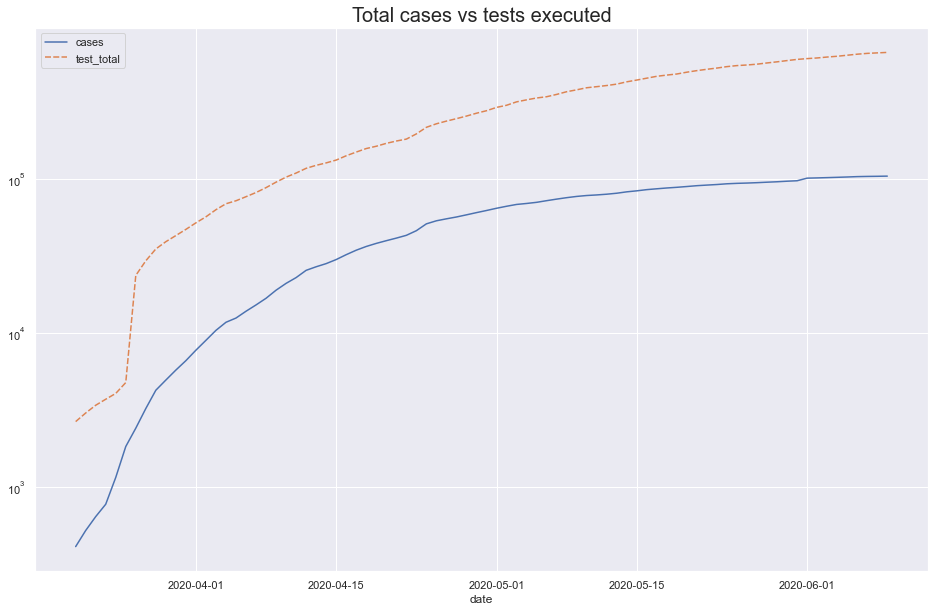

In [7]:
ax = sns.lineplot(data=tests_df)
ax.set_yscale("log")

plt.title("Total cases vs tests executed")

plt.show()

   # Data for the past week

## Daily new cases

In [8]:
@interact
def show_daily_stats(days=widgets.IntSlider(min=0, max=len(smas), step=1, value=7)):
    return evolution_df.iloc[-days:]

,cases,deaths,test_total
date,,,
2020-06-03,429.0,67.0,8362.0
2020-06-04,471.0,49.0,7115.0
2020-06-05,494.0,34.0,9760.0
2020-06-06,575.0,54.0,9800.0
2020-06-07,304.0,27.0,7808.0
2020-06-08,190.0,37.0,4782.0
2020-06-09,263.0,55.0,4660.0


## Daily percent change

In [9]:
@interact
def show_daily_pct_change(days=widgets.IntSlider(min=0, max=len(smas), step=1, value=7)):
    return to_pct_string(df.pct_change().iloc[-7:])

,cases,deaths,test_positive,test_total
date,,,,
2020-06-03,0.42%,0.95%,0.42%,1.38%
2020-06-04,0.46%,0.69%,0.46%,1.16%
2020-06-05,0.48%,0.47%,0.48%,1.57%
2020-06-06,0.56%,0.75%,0.56%,1.55%
2020-06-07,0.29%,0.37%,0.29%,1.22%
2020-06-08,0.18%,0.51%,0.18%,0.74%
2020-06-09,0.25%,0.75%,0.25%,0.71%
